# Triple Exponential Moving Average (TEMA) 

https://www.investopedia.com/terms/t/triple-exponential-moving-average.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
df['EMA'] = ta.EMA(df['Adj Close'], timeperiod=5) 

In [5]:
df['EMA_2'] = ta.EMA(df['EMA'], timeperiod=5) 

In [6]:
df['EMA_3'] = ta.EMA(df['EMA_2'], timeperiod=5) 

In [7]:
df['TEMA'] = (3*df['EMA']) - (3*(df['EMA_2'])) + (df['EMA_3'])

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA,EMA_2,EMA_3,TEMA
Date,,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,NaN,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,204.297842,NaN,NaN,NaN


Text(0,0.5,'Price')

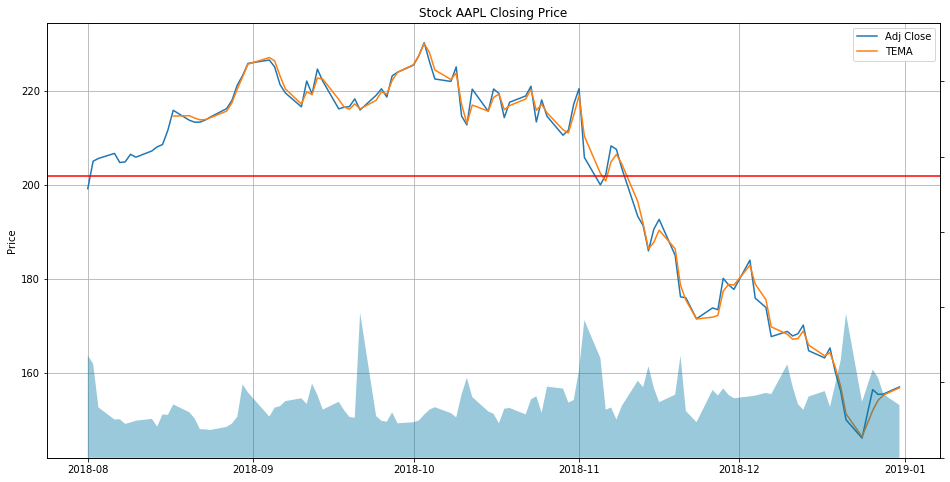

In [9]:
# Line Chart
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['TEMA'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

## Candlestick with TEMA

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,EMA_2,EMA_3,TEMA,VolumePositive
0,736923.0,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,211.164601,208.438566,206.492286,214.670391,True
1,736926.0,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,212.041044,209.639392,207.541321,214.746277,False
2,736927.0,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,212.486418,210.588401,208.557014,214.251067,False
3,736928.0,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,212.786641,211.321147,209.478392,213.874872,False
4,736929.0,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,213.132322,211.924872,210.293886,213.916235,False


Text(0,0.5,'Price')

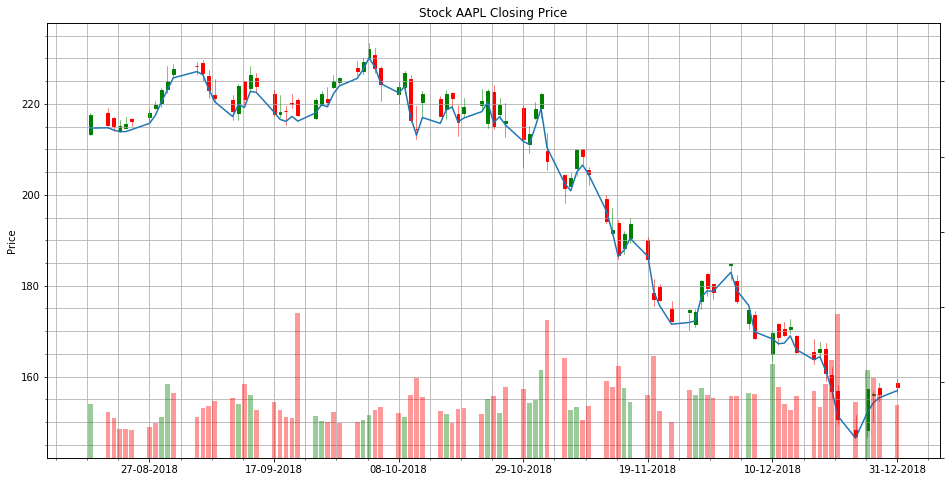

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['TEMA'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')